# Метрики

**Дано:**
$\{x_1, \ldots, x_l\}\in X$, $\{y_1,\ldots,y_l\}\in Y$ - выборка из объектов и их меток (задача классификации);    
$a: X\rightarrow Y$ - обученный классификатор.

**Найти:**
Качество классификации.

## Классификация

<img src="presicion_recall.png" style="float: right;" style="width: 100px;"/>
- Accuracy:
$$ 
Accuracy = \frac{1}{l}\sum_{i=1}^l[y_i = a(x_i)];
$$

- Precision (точность):
$$
Precision = \frac{TP}{TP + FP};
$$

- Recall (полнота):
$$
Recall = \frac{TP}{TP + FN};
$$

где обозначения *TP*, *FP*, *FN* и *TN* — элементы матрицы ошибок:

| | y = 1 | y = 0 |
|------|------|
|   a(x) = 1  | TP| FP (type I error, "ложная тревога") |
| a(x) = 0| FN (type II error, "пропуск цели") | TN |

- $f_1$-score:
$$
f_1score = 2\cdot\frac{Precision \cdot Recall}{Precision + Recall}
$$

<img src="f1.png" style="width: 600px;"/>

См. [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html),
[precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html),
[recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html),
[f1_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html),
[classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
from sklearn.metrics import classification_report
y_true = ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b']
y_pred = ['a', 'b', 'a', 'a', 'b', 'a', 'a', 'b']
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          a       0.60      0.75      0.67         4
          b       0.67      0.50      0.57         4

avg / total       0.63      0.62      0.62         8



In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[3, 1],
       [2, 2]])

In [6]:
y_true = ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'c', 'c', 'c']
y_pred = ['a', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'c', 'c', 'a']
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          a       0.50      0.75      0.60         4
          b       0.67      0.50      0.57         4
          c       1.00      0.67      0.80         3

avg / total       0.70      0.64      0.64        11



Некоторые классификаторы предсказывают не только метку класса, но и степень принадлежности к ней. Можно подбирать порог, начиная с которого мы относим объект к какому-нибудь из классов.

    class  score
0       0   0.05
1       0   0.10
2       0   0.15
3       1   0.20
4       0   0.25
5       1   0.30
6       0   0.35
7       0   0.40
8       0   0.45
9       1   0.50
10      1   0.55
11      0   0.60
12      1   0.65
13      1   0.70
14      0   0.75
15      1   0.80
16      1   0.85
17      1   0.90
18      1   0.95


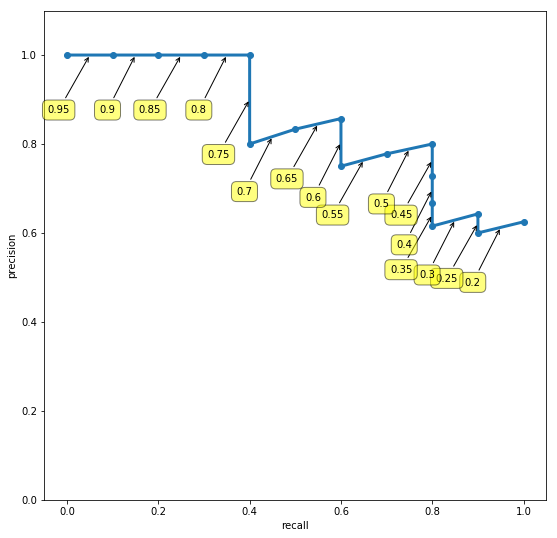

In [4]:
from sklearn.metrics import precision_recall_curve

y_true = np.hstack([
    np.zeros(3),
    np.array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1]), 
    np.ones(3)
]).astype(int)
y_scores = np.linspace(0.05, 0.95, 19)
print(pd.DataFrame.from_items([('class', y_true), ('score', y_scores)]))
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

plt.figure(figsize=(9, 9))
plt.plot(recall, precision, lw=3, marker='o')
plt.ylim(0., 1.1)
for label, x, y in zip(
    thresholds,
    (recall[1:] + recall[:-1]) / 2,
    (precision[1:] + precision[:-1]) / 2
):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, -60),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.xlabel('recall')
plt.ylabel('precision');

Еще одним способом визуализации выбора порога является [ROC-кривая](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) (receiver operating characteristic):
 - OX: $FPR = \frac{FP}{FP + TN}$
 - OY: $TPR = \frac{TP}{TP + FN}$

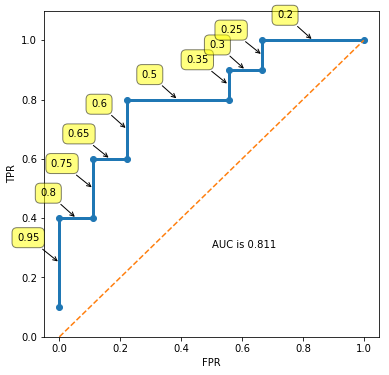

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=3, marker='o')
plt.ylim(0., 1.1)
for label, x, y in zip(
    thresholds,
    (fpr[1:] + fpr[:-1]) / 2,
    (tpr[1:] + tpr[:-1]) / 2
):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.plot([0, 1], [0, 1], ls='--')
plt.text(0.5, 0.3, 'AUC is {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR');

<img src="roc.png" style="width: 400px;"/>

Если классификатор умеет рассчитывать еще и вероятности, то можно вычислять [logloss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html):
$$logloss = -\dfrac{1}{N}\sum_{i=1}^N (y_i\log{p_i} + (1-y_i)\log{(1 - p_i)})$$

In [86]:
from sklearn.metrics import log_loss
print('logloss in {:.3f}'.format(log_loss(y_true, y_scores)))

logloss in 0.520


<img src="log_loss.png" style="width: 500px;"/>

[Различные метрики](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)